# Understanding galaxy star formation rate estimates using radio luminosities

The star formation rate (SFR) of a galaxy is a fundamental property describing its current degree of activity and (together with its stellar mass) its current evolutionary state. There are, however, many different ways to estimate galaxy star formation rates, and all suffer from various limitations. Radio luminosity is potentially a unique tracer for this key property, presuming that any contribution from an active galactic nucleus (AGN) can be excluded, due to its direct link to the high-mass stellar population. In this project we will use data from EMU early science observations and the GAMA survey, in the G23 field. After excluding AGN systems through standard emission line diagnostics, we will explore a suite of common SFR estimators, and compare these against a selection of published radio SFR estimators, newly calculated for the EMU/GAMA data. We will also use the population synthesis tool, ProSpect, to provide independent SFR estimates (without relying on the radio data), as a step toward synthesising all available photometry in inferring SFRs. We will, finally, use ProSpect again to incorporate the radio measurements explicitly to derive refined SFRs, and use these directly to assess the reliabiility and robustness of any SFR estimates based on radio luminosity in isolation. A stretch goal for this project will be to link the SFRs and stellar masses for this sample to explore the “galaxy main sequence” of SFR as a function of stellar mass, and how it evolves over the redshift range spanned by the GAMA measurements.

## Load in Packages

In [3]:
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u

## Load in Data

In [5]:
cd \Project_AHopkins\Data

[WinError 3] The system cannot find the path specified: '\\Project_AHopkins\\Data'
E:\


### EMU Data

In [11]:
EMU_G23=fits.open('G23-ASKAP-EMUES-master-cat.fits')

In [13]:
EMU_G23.info()

Filename: G23-ASKAP-EMUES-master-cat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (1986,)   uint8   
  1  Joined        1 BinTableHDU     69   39812R x 27C   [19A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, A, D, K, D, D]   


In [15]:
EMU_data=Table(EMU_G23[1].data)
EMU_data

Source_Name,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,Length,Width,PA,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,Maj,E_Maj,Min,E_Min,Separation,Isl_rms,SCode,Size,Host_ID,Host_RA,Host_DEC
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,int64,float64,float64
EMUJ231206.0-295715,348.02509948360387,0.00021586597170793756,-29.954085458637483,0.00020493647812782853,0.0031191781316521976,0.0001744963292251913,0.0006472025257037361,2.9874569949915333e-05,nan,nan,131.9241182388775,40.71967568790505,2.48804761018717,5.782300622112664,0.41585645352697315,41.94024503398222,2.48804761018717,11.578378870711653,0.41585645352697315,nan,3.679393557831645e-05,S,40.71967568790505,2333628,348.024928904365,-29.9558033489725
EMUJ231235.4-340420,348.147392076043,8.651310333678523e-06,-34.07215763949391,2.4013945637618295e-05,0.30174561328627336,0.0005727687537922443,0.06383270306391549,6.641937943641096e-05,nan,nan,106.9968868552262,71.37414716641496,0.2148160592386376,8.848811935011557,0.025990270330416024,72.07652907013589,0.2148160592386376,13.381744928704881,0.025990270330416024,nan,6.641937943641096e-05,S,71.37414716641496,999999,nan,nan
EMUJ231245.4-353949,348.18904775580614,0.001985862738832731,-35.66356645228513,0.0020416009596209415,0.010204209121094257,0.0015038209494566458,0.0011247371203763703,0.00012264466630683085,131.06890402814224,78.77775772729454,1.5799870690144502,nan,nan,nan,nan,nan,nan,nan,nan,96.98404164548367,0.00011609694047365338,M,114.02647283681296,999999,nan,nan
EMUJ231154.7-300310,347.97775035752665,0.001223848101519971,-30.0528580951538,0.0004895196974755447,0.0022338696618959177,0.0005515122128125207,0.00020849523137931184,3.755812213057652e-05,nan,nan,166.37549154101083,44.58438725585159,10.584039411659933,16.025704254937672,3.5832459376428334,45.6992166729723,10.584039411659933,18.912156037878816,3.5832459376428334,nan,3.755812213057652e-05,S,44.58438725585159,2319164,347.978348653455,-30.0551409099734
EMUJ231148.4-311817,347.951724939382,6.69460626216486e-05,-31.304672127209667,3.9648847427289634e-05,0.015876951940967422,0.00020363132542422846,0.005733791110514785,3.6431905755307525e-05,nan,nan,27.32969251762146,32.46413865105758,0.6429129311871838,6.760469617713388,0.14738651574061393,33.97783600664911,0.6429129311871838,12.104568748436018,0.14738651574061393,nan,3.6431905755307525e-05,S,32.46413865105758,2278176,347.95153639599,-31.3036296515367
EMUJ231123.3-325618,347.8469446979342,0.0001015034976158127,-32.93821841227917,0.00011303827821770052,0.0504418669362338,0.00030884963630284563,0.023991515163281865,4.132093090447597e-05,124.25250871765229,14.80666835291479,64.29971810330215,nan,nan,nan,nan,nan,nan,nan,nan,92.05524788211837,4.078740433518154e-05,M,108.15387829988532,999999,nan,nan
EMUJ231115.9-330741,347.8162410249929,7.717882633173265e-05,-33.1280361982254,7.202899419962689e-05,0.002245348768286147,0.00011642461659382351,0.0009150095859142413,3.1457188015338033e-05,36.60423097131997,12.584412954646158,175.524911994586,nan,nan,nan,nan,nan,nan,nan,nan,29.05758509577024,3.146600283798762e-05,M,32.83090803354511,2226069,347.816873838033,-33.1282466030221
EMUJ231049.9-295101,347.7077410361026,3.0546889961804143e-05,-29.85025799103915,4.821764861389811e-05,0.029324941550479267,0.0002296030197074008,0.008106830999892857,3.980591645813547e-05,nan,nan,120.2487414880885,39.1404618960873,0.47746217577749944,5.065572767055534,0.07855926630790418,40.40894007335493,0.47746217577749944,11.235735599655728,0.07855926630790418,nan,3.980591645813547e-05,S,39.1404618960873,2086589,347.708414726035,-29.8503632514963
EMUJ231103.6-315436,347.7649176213968,4.611257753273522e-05,-31.91010559972123,7.353336985261939e-05,0.0073787576935448185,0.00016690456883528023,0.001935883539945615,3.24450375046581e-05,nan,nan,119.63356374283714,31.127773647367825,0.7234489740489828,3.28186617282

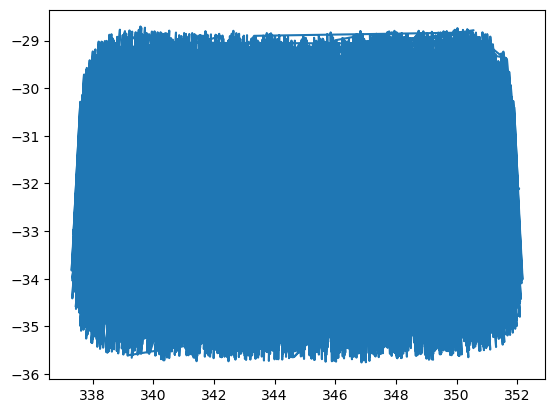

In [17]:
plt.plot(EMU_data['RA'], EMU_data['DEC'])

### GAMA

In [19]:
GFit=fits.open('GaussFitSimplev05.fits')
gkv=fits.open('gkvScienceCatv02.fits')
SMasses=fits.open('StellarMassesGKVv24.fits')

In [20]:
GFit.info()
gkv.info()
SMasses.info()

Filename: GaussFitSimplev05.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (35079,)   uint8   
  1  GaussFitSimple    1 BinTableHDU    833   427829R x 214C   [33A, J, D, D, E, J, 9A, I, L, L, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, I, I, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, I, I, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I]   
Filename: gkvScienceCatv02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      

In [21]:
GFit_data=Table(GFit[1].data)
GFit_data

SPECID,CATAID,RA,DEC,Z,NQ,SURVEY,SURVEY_CODE,IS_BEST,IS_SBEST,SN,MEAN_CONT,SIGMA_CONT,FSCALE,D4000N,D4000N_ERR,OII_CONT,OII_CONT_ERR,OII_GRAD,OII_GRAD_ERR,OII_REDCHI_LINE,OII_REDCHI_EM,OII_FITFAIL,OII_MODSEL_EM_LINE,OII_BF,OII_DELBIC,OII_DELAIC,OII_CEN,AMP_OIIR,AMP_OIIR_ERR,POS_OIIR,POS_OIIR_ERR,SIG_OIIR,SIG_OIIR_ERR,OIIR_FLUX,OIIR_FLUX_ERR,OIIR_EW,OIIR_EW_ERR,AMP_OIIB,AMP_OIIB_ERR,POS_OIIB,POS_OIIB_ERR,SIG_OIIB,SIG_OIIB_ERR,OIIB_FLUX,OIIB_FLUX_ERR,OIIB_EW,OIIB_EW_ERR,OIIB_NPEG,OIIR_NPEG,HB_CONT,HB_CONT_ERR,HB_GRAD,HB_GRAD_ERR,HB_REDCHI_LINE,HB_REDCHI_ABS,HB_REDCHI_EM,HB_FITFAIL,HB_MODSEL_EM_LINE,HB_MODSEL_ABS_LINE,HB_MODSEL_EM_ABS,HB_BF,HB_DELBIC,HB_DELAIC,HB_CEN,AMP_HB,AMP_HB_ERR,POS_HB,POS_HB_ERR,SIG_HB,SIG_HB_ERR,HB_FLUX,HB_FLUX_ERR,HB_EW,HB_EW_ERR,HB_NPEG,AMP_OIIIB,AMP_OIIIB_ERR,POS_OIIIB,POS_OIIIB_ERR,SIG_OIIIB,SIG_OIIIB_ERR,OIIIB_FLUX,OIIIB_FLUX_ERR,OIIIB_EW,OIIIB_EW_ERR,AMP_OIIIR,AMP_OIIIR_ERR,POS_OIIIR,POS_OIIIR_ERR,SIG_OIIIR,SIG_OIIIR_ERR,OIIIR_FLUX,OIIIR_FLUX_ERR,OIIIR_EW,OIIIR_EW_ERR,OIIIB_NPEG,OIIIR_NPEG,HA_CONT,HA_CONT_ERR,HA_GRAD,HA_GRAD_ERR,HA_REDCHI_LINE,HA_REDCHI_ABS,HA_REDCHI_EM,HA_FITFAIL,HA_MODSEL_EM_LINE,HA_MODSEL_ABS_LINE,HA_MODSEL_EM_ABS,HA_BF,HA_DELBIC,HA_DELAIC,HA_CEN,AMP_HA,AMP_HA_ERR,POS_HA,POS_HA_ERR,SIG_HA,SIG_HA_ERR,HA_FLUX,HA_FLUX_ERR,HA_EW,HA_EW_ERR,HA_NPEG,AMP_NIIB,AMP_NIIB_ERR,POS_NIIB,POS_NIIB_ERR,SIG_NIIB,SIG_NIIB_ERR,NIIB_FLUX,NIIB_FLUX_ERR,NIIB_EW,NIIB_EW_ERR,AMP_NIIR,AMP_NIIR_ERR,POS_NIIR,POS_NIIR_ERR,SIG_NIIR,SIG_NIIR_ERR,NIIR_FLUX,NIIR_FLUX_ERR,NIIR_EW,NIIR_EW_ERR,NIIB_NPEG,NIIR_NPEG,SII_CONT,SII_CONT_ERR,SII_GRAD,SII_GRAD_ERR,SII_REDCHI_LINE,SII_REDCHI_EM,SII_FITFAIL,SII_MODSEL_EM_LINE,SII_BF,SII_DELBIC,SII_DELAIC,SII_CEN,AMP_SIIB,AMP_SIIB_ERR,POS_SIIB,POS_SIIB_ERR,SIG_SIIB,SIG_SIIB_ERR,SIIB_FLUX,SIIB_FLUX_ERR,SIIB_EW,SIIB_EW_ERR,AMP_SIIR,AMP_SIIR_ERR,POS_SIIR,POS_SIIR_ERR,SIG_SIIR,SIG_SIIR_ERR,SIIR_FLUX,SIIR_FLUX_ERR,SIIR_EW,SIIR_EW_ERR,SIIB_NPEG,SIIR_NPEG,OI_CONT,OI_CONT_ERR,OI_GRAD,OI_GRAD_ERR,OI_REDCHI_LINE,OI_REDCHI_EM,OI_FITFAIL,OI_MODSEL_EM_LINE,OI_BF,OI_DELBIC,OI_DELAIC,OI_CEN,AMP_OIB,AMP_OIB_ERR,POS_OIB,POS_OIB_ERR,SIG_OIB,SIG_OIB_ERR,OIB_FLUX,OIB_FLUX_ERR,OIB_EW,OIB_EW_ERR,AMP_OIR,AMP_OIR_ERR,POS_OIR,POS_OIR_ERR,SIG_OIR,SIG_OIR_ERR,OIR_FLUX,OIR_FLUX_ERR,OIR_EW,OIR_EW_ERR,OIB_NPEG,OIR_NPEG
str33,int32,float64,float64,float32,int32,str9,int16,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16
1030206976962881536,454340,212.14487,-2.44026,0.39637625,3,SDSS,1,

In [22]:
gkv_data=Table(gkv[1].data)
gkv_data

uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,EBV,mag,R50,R90,R100,N100,axrat,ang,flux_FUVt,flux_FUVl,flux_err_FUVt,flux_NUVt,flux_NUVl,flux_err_NUVt,flux_ut,flux_ul,flux_err_ut,flux_gt,flux_gl,flux_err_gt,flux_rt,flux_rl,flux_err_rt,flux_it,flux_il,flux_err_it,flux_Zt,flux_Zl,flux_err_Zt,flux_Yt,flux_Yl,flux_err_Yt,flux_Jt,flux_Jl,flux_err_Jt,flux_Ht,flux_Hl,flux_err_Ht,flux_Kt,flux_Kl,flux_err_Kt,flux_W1t,flux_W1l,flux_err_W1t,flux_W2t,flux_W2l,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z,NQ
int64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,int16,int32,int16,float32,int16
128980000105066,129.582792816265,-1.6071957423484902,129.583476454027,-1.60623079728025,129.583460898472,-1.60624913061358,-1.0971056e-12,4.0652976e-12,-0.25130096,0.036009856,19.405678,3.609053,6.6396127,9.796134,1524,0.58093166,3.1104028,5.1972224e-06,-4.945731e-06,7.55846e-09,6.9640946e-06,-2.9609084e-06,3.520193e-07,2.9444293e-05,2.3908744e-05,1.4995088e-06,5.2687985e-05,4.327435e-05,6.2246727e-07,7.121142e-05,6.291893e-05,7.497675e-07,8.5276966e-05,6.910123e-05,1.2848093e-06,5.8173344e-05,3.7664915e-05,2.9965522e-06,7.0828304e-05,5.6028675e-05,4.86608e-06,7.3420124e-05,5.221727e-05,9.183198e-06,0.00014195625,8.873326e-06,3.7649366e-05,1.5329219e-05,3.875053e-05,1.2237281e-05,0.00011442549,8.649193e-05,1.0311395e-06,0.000116526644,0.000116733776,2.2457664e-06,True,False,True,2,0,0,-9.999,0
128980000106700,129.583350423161,-1.45236135892561,129.583435426215,-1.45237057450373,129.58341987066,-1.45238890783706,-3.3224942e-13,4.174099e-12,-0.25130096,0.03496111,19.484756,0.55825794,1.430444,2.6182337,118,0.62967247,0.26645187,9.627341e-07,1.0106259e-06,4.791858e-08,3.5372827e-07,3.6086294e-07,6.0319714e-08,1.362258e-05,1.2499267e-05,3.6881318e-07,3.9540882e-05,3.8128655e-05,1.5857115e-07,6.058929e-05,5.8678834e-05,1.9433817e-07,7.228798e-05,6.9418464e-05,3.3837696e-07,7.905501e-05,7.576889e-05,4.9439683e-07,8.349908e-05,8.0886995e-05,9.819364e-07,7.423986e-05,7.299314e-05,1.8746449e-06,7.17362e-05,7.4692514e-05,2.9339903e-06,5.292216e-05,4.8782076e-05,3.6645615e-06,2.285605e-05,1.5576652e-05,4.907494e-07,3.5424275e-06,4.241766e-06,4.1962772e-07,True,False,False,2,3576031,0,0.00028,4
128980000201367,129.58341311879,-1.95452488165119,129.58347514412,-1.95452585254355,129.58345958856398,-1.95454418587688,-1.3064895e-12,4.369662e-12,-0.25130096,0.03340908,19.857677,0.62082493,1.9027302,2.840302,157,0.7119019,154.28175,3.1996713e-06,7.030642e-07,1.1737637e-08,1.939995e-06,2.146809e-06,9.905652e-08,3.92009e-06,4.9171776e-06,4.584592e-07,1.7434008e-05,1.4996975e-05,1.842847e-07,4.1194766e-05,3.8298374e-05,2.3642771e-07,5.1555486e-05,4.8008125e-05,4.1685033e-07,6.2706524e-05,5.8647653e-05,5.3309327e-07,6.753106e-05,5.835639e-05,1.0282149e-06,7.52887e-05,6.60227e-05,2.1738113e-06,8.0480546e-05,8.475267e-05,3.7128193e-06,6.804068e-05,7.249283e-05,3.883183e-06,1.5705064e-05,1.5884345e-05,4.53738e-07,1.2957415e-05,2.821911e-05,9.679956e-07,True,False,True,2,3552217,0,0.00021,3
128980000201389,129.583058051505,-1.95223861108405,129.583474591601,-1.95245442306842,129.583459036045,-1.95247275640176,-1.3625731e-12,4.3123933e-12,-0.25130096,0.03340908,19.680689,3.0021987,5.3902597,6.8036785,677,0.5349961,10.18928,1.9271483e-06,2.4205658e-06,1.8359255e-08,5.686819e-06,7.5227517e-06,1.9481368e-07,1.8084871e-05,1.4454416e-05,9.028855e-07,4.24143e-05,3.7988968e-05,3.8950068e-07,5.56226e-05,4.7417074e-05,4.8562106e-07,5.822017e-05,5.0911316e-05,9.0368906e-07,3.5894678e-05,2.1006648e-05,1.1087083e-06,3.6322577e-05,1.473167

In [23]:
SMasses_data=Table(SMasses[1].data)
SMasses_data

uberID,Z,comovingdist,nefffilt,snratio,ppp,nefftemp,logmstar,dellogmstar,mstar,delmstar,logage,dellogage,logtau,dellogtau,logmet,dellogmet,dustEBV,deldustEBV,logmremnants,dellogmremnants,logmintsfh,dellogmintsfh,logLWage,dellogLWage,uminusr,deluminusr,uminusr_stars,deluminusr_stars,gminusi,delgminusi,gminusi_stars,delgminusi_stars,logmoverl_i,dellogmoverl_i,C_logM_gi,C_logM_gistars,C_logM_ur,C_logM_urstars,C_logM_logLWage,C_logM_EBV,absmag_FUV,delabsmag_FUV,absmag_NUV,delabsmag_NUV,absmag_u,delabsmag_u,absmag_g,delabsmag_g,absmag_r,delabsmag_r,absmag_i,delabsmag_i,absmag_Z,delabsmag_Z,absmag_Y,delabsmag_Y,absmag_J,delabsmag_J,absmag_H,delabsmag_H,absmag_K,delabsmag_K,absmag_W1,delabsmag_W1,absmag_W2,delabsmag_W2,absmag_FUV_stars,delabsmag_FUV_stars,absmag_NUV_stars,delabsmag_NUV_stars,absmag_u_stars,delabsmag_u_stars,absmag_g_stars,delabsmag_g_stars,absmag_r_stars,delabsmag_r_stars,absmag_i_stars,delabsmag_i_stars,absmag_Z_stars,delabsmag_Z_stars,absmag_Y_stars,delabsmag_Y_stars,absmag_J_stars,delabsmag_J_stars,absmag_H_stars,delabsmag_H_stars,absmag_K_stars,delabsmag_K_stars,absmag_W1_stars,delabsmag_W1_stars,absmag_W2_stars,delabsmag_W2_stars,fitflux_FUV,delfitflux_FUV,fitflux_NUV,delfitflux_NUV,fitflux_u,delfitflux_u,fitflux_g,delfitflux_g,fitflux_r,delfitflux_r,fitflux_i,delfitflux_i,fitflux_Z,delfitflux_Z,fitflux_Y,delfitflux_Y,fitflux_J,delfitflux_J,fitflux_H,delfitflux_H,fitflux_K,delfitflux_K,fitflux_W1,delfitflux_W1,fitflux_W2,delfitflux_W2
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
174001148708942,0.11355,479.0973,6.2878246,100.18276,0.34930348,51.45877,11.034554,0.16796392,117403025000.0,50683724000.0,9.295354,0.4368287,7.9003725,0.34390035,-1.9599109,0.454774,0.27084273,0.16289686,10.175722,0.3174033,11.034565,0.16796012,9.273687,0.4429298,2.516949,0.056631275,1.8566877,0.44471547,1.1962037,0.025192922,0.694418,0.29110163,1.9151711,0.16850545,-0.23080349,0.83277124,0.7775027,0.8331794,0.953185,-0.82238525,-14.668681,0.99016905,-16.850561,0.44403756,-19.892733,0.045055136,-21.60238,0.016682373,-22.408857,0.0157014,-22.798492,0.008943722,-23.09112,0.0241848,-23.338549,0.025962684,-23.506721,0.0358256,-23.783941,0.072487086,-23.667835,0.12656063,-23.036589,0.16767718,-22.493618,0.17939559,-18.661371,3.1538444,-19.998156,1.5385035,-21.864077,0.7882966,-23.084892,0.6176698,-23.480968,0.47591728,-23.64783,0.4067494,-23.768421,0.3484376,-23.865957,0.25782812,-23.886995,0.20784473,-24.010534,0.15796834,-23.754292,0.15811087,-23.036589,0.16767718,-22.493618,0.17939559,5.690305e-14,6.775749e-14,3.6399039e-13,1.6864235e-13,5.6681985e-12,2.3305855e-13,3.1053687e-11,8.6069227e-13,7.714289e-11,1.716217e-12,1.1429423e-10,8.8656323e-13,1.5763278e-10,1.3513253e-12,1.9866508e-10,2.5969533e-12,2.4991345e-10,5.6033585e-12,3.1391387e-10,1.7424763e-11,3.3558023e-10,3.4895496e-11,1.9552003e-10,3.1849398e-11,1.2842516e-10,1.942479e-11
174001129809205,0.33246,1318.3912,5.9967666,93.80888,0.302992,281.91925,11.148881,0.105887055,144829280000.0,31741757000.0,9.716526,0.20359646,8.142615,0.40790892,-2.1389575,0.237915,0.091259815,0.055591907,10.469904,0

In [27]:
SMasses_pd=SMasses_data.to_pandas()
gkv_pd=gkv_data.to_pandas()
GFit_pd=GFit_data.to_pandas()
EMU_pd=EMU_data.to_pandas()

SMasses_pd

,uberID,Z,comovingdist,nefffilt,snratio,ppp,nefftemp,logmstar,dellogmstar,mstar,...,fitflux_J,delfitflux_J,fitflux_H,delfitflux_H,fitflux_K,delfitflux_K,fitflux_W1,delfitflux_W1,fitflux_W2,delfitflux_W2
0,174001148708942,0.11355,479.097290,6.287825,100.182762,0.349303,51.458771,11.034554,0.167964,1.174030e+11,...,2.499135e-10,5.603358e-12,3.139139e-10,1.742476e-11,3.355802e-10,3.489550e-11,1.955200e-10,3.184940e-11,1.284252e-10,1.942479e-11
1,174001129809205,0.33246,1318.391235,5.996767,93.808884,0.302992,281.919250,11.148881,0.105887,1.448293e+11,...,2.475892e-11,3.675512e-13,2.940847e-11,1.357550e-12,3.592376e-11,1.934136e-12,2.244371e-11,1.845631e-12,1.468039e-11,1.246132e-12
2,174001086008788,0.11520,485.792633,6.302616,97.363884,0.530939,526.906372,10.701748,0.133636,5.272319e+10,...,8.189730e-11,2.428371e-12,9.340034e-11,4.683376e-12,8.710180e-11,6.415812e-12,4.777866e-11,3.318096e-12,2.853520e-11,2.494388e-12
3,174001084207633,0.19673,809.668213,6.554882,107.262512,0.494388,276.351868,10.912251,0.127328,8.523352e+10,...,5.867788e-11,1.241358e-12,6.834367e-11,2.952692e-12,7.510267e-11,5.252519e-12,4.268939e-11,4.111359e-12,2.729991e-11,3.315212e-12
4,174001048108112,0.10605,448.594666,6.248545,100.652809,0.231997,575.357117,9.397331,0.106791,2.575447e+09,...,1.669237e-11,7.717446e-13,1.733798e-11,1.535305e-12,1.585587e-11,1.925267e-12,8.781777e-12,9.350885e-13,5.335522e-12,5.616250e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370111,133000496408411,0.61561,2259.216797,6.454678,80.419472,0.028299,9.713466,10.866830,0.028603,7.376249e+10,...,6.942789e-12,9.017103e-14,1.015855e-11,2.571450e-13,1.257177e-11,5.613342e-13,1.473035e-11,1.482194e-12,8.185788e-12,1.008833e-12
370112,176000226808518,0.62379,2285.165527,6.461801,40.961609,0.157532,363.472931,10.550574,0.134124,3.721506e+10,...,2.987659e-12,9.677580e-14,3.263347e-12,1.388063e-13,3.222764e-12,2.190864e-13,2.640103e-12,3.172676e-13,1.632423e-12,2.029202e-13
370113,220000351709169,0.80234,2797.738770,6.021619,70.991867,0.048825,29.746763,11.509956,0.121146,3.387543e+11,...,1.227767e-11,1.195465e-13,1.777505e-11,4.992805e-13,2.421630e-11,9.633694e-13,2.943788e-11,1.954066e-12,1.827333e-11,1.791262e-12
370114,178010820103143,0.73591,2614.820801,6.187053,57.584915,0.031370,259.261169,11.388964,0.086423,2.496464e+11,...,7.332499e-12,1.779697e-13,9.912655e-12,4.637352e-13,1.120868e-11,1.253567e-12,1.177464e-11,2.195984e-12,7.706235e-12,1.419217e-12


In [28]:
SMasses_pd.loc[:,"uberID"]

0         174001148708942
1         174001129809205
2         174001086008788
3         174001084207633
4         174001048108112
               ...       
370111    133000496408411
370112    176000226808518
370113    220000351709169
370114    178010820103143
370115    181010372002164
Name: uberID, Length: 370116, dtype: int64

## Cross Matching

### Join GAMA tables

##### gkv + SMasses

In [32]:
gkv_smasses = pd.merge(SMasses_pd, gkv_pd, on="uberID") 
gkv_smasses

,uberID,Z_x,comovingdist,nefffilt,snratio,ppp,nefftemp,logmstar,dellogmstar,mstar,...,flux_W2l,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z_y,NQ
0,174001148708942,0.11355,479.097290,6.287825,100.182762,0.349303,51.458771,11.034554,0.167964,1.174030e+11,...,1.000000e+20,0.000000,False,True,False,1,6648,2,0.11355,4
1,174001129809205,0.33246,1318.391235,5.996767,93.808884,0.302992,281.919250,11.148881,0.105887,1.448293e+11,...,1.000000e+20,0.000000,False,True,False,1,6658,2,0.33246,4
2,174001086008788,0.11520,485.792633,6.302616,97.363884,0.530939,526.906372,10.701748,0.133636,5.272319e+10,...,1.000000e+20,0.000000,False,True,False,1,6677,2,0.11520,5
3,174001084207633,0.19673,809.668213,6.554882,107.262512,0.494388,276.351868,10.912251,0.127328,8.523352e+10,...,1.000000e+20,0.000000,False,True,False,1,6678,2,0.19673,5
4,174001048108112,0.10605,448.594666,6.248545,100.652809,0.231997,575.357117,9.397331,0.106791,2.575447e+09,...,1.000000e+20,0.000000,False,True,False,1,6683,2,0.10605,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361743,176980620105452,0.53226,1999.150391,6.305881,61.899403,0.130179,183.470032,10.934457,0.106656,8.859091e+10,...,9.534177e-05,0.000005,False,False,False,1,9100032,5,0.53226,4
361744,131990500011804,0.56853,2113.281982,6.375981,86.941277,0.238611,88.454628,11.429546,0.085732,2.737705e+11,...,1.668986e-04,0.000002,True,False,False,1,9100040,0,0.56853,4
361745,132010558803547,0.56987,2117.470215,6.387102,55.053959,0.071233,194.768631,11.104779,0.114652,1.324184e+11,...,1.005046e-04,0.000002,False,False,True,1,9100053,2,0.56987,4
361746,211980935201898,0.63985,2332.187012,6.453656,90.688469,0.017656,35.579594,11.355308,0.090039,2.324748e+11,...,1.490704e-04,0.000001,False,False,False,1,9100074,5,0.63985,4


In [33]:
gkv_smasses[:1]

,uberID,Z_x,comovingdist,nefffilt,snratio,ppp,nefftemp,logmstar,dellogmstar,mstar,...,flux_W2l,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z_y,NQ
0,174001148708942,0.11355,479.09729,6.287825,100.182762,0.349303,51.458771,11.034554,0.167964,1.174030e+11,...,1.000000e+20,0.0,False,True,False,1,6648,2,0.11355,4


In [34]:
pd.set_option('display.max_columns', gkv_smasses.shape[0]+1)

In [35]:
gkv_smasses[:1]

,uberID,Z_x,comovingdist,nefffilt,snratio,ppp,nefftemp,logmstar,dellogmstar,mstar,delmstar,logage,dellogage,logtau,dellogtau,logmet,dellogmet,dustEBV,deldustEBV,logmremnants,dellogmremnants,logmintsfh,dellogmintsfh,logLWage,dellogLWage,uminusr,deluminusr,uminusr_stars,deluminusr_stars,gminusi,delgminusi,gminusi_stars,delgminusi_stars,logmoverl_i,dellogmoverl_i,C_logM_gi,C_logM_gistars,C_logM_ur,C_logM_urstars,C_logM_logLWage,C_logM_EBV,absmag_FUV,delabsmag_FUV,absmag_NUV,delabsmag_NUV,absmag_u,delabsmag_u,absmag_g,delabsmag_g,absmag_r,delabsmag_r,absmag_i,delabsmag_i,absmag_Z,delabsmag_Z,absmag_Y,delabsmag_Y,absmag_J,delabsmag_J,absmag_H,delabsmag_H,absmag_K,delabsmag_K,absmag_W1,delabsmag_W1,absmag_W2,delabsmag_W2,absmag_FUV_stars,delabsmag_FUV_stars,absmag_NUV_stars,delabsmag_NUV_stars,absmag_u_stars,delabsmag_u_stars,absmag_g_stars,delabsmag_g_stars,absmag_r_stars,delabsmag_r_stars,absmag_i_stars,delabsmag_i_stars,absmag_Z_stars,delabsmag_Z_stars,absmag_Y_stars,delabsmag_Y_stars,absmag_J_stars,delabsmag_J_stars,absmag_H_stars,delabsmag_H_stars,absmag_K_stars,delabsmag_K_stars,absmag_W1_stars,delabsmag_W1_stars,absmag_W2_stars,delabsmag_W2_stars,fitflux_FUV,delfitflux_FUV,fitflux_NUV,delfitflux_NUV,fitflux_u,delfitflux_u,fitflux_g,delfitflux_g,fitflux_r,delfitflux_r,fitflux_i,delfitflux_i,fitflux_Z,delfitflux_Z,fitflux_Y,delfitflux_Y,fitflux_J,delfitflux_J,fitflux_H,delfitflux_H,fitflux_K,delfitflux_K,fitflux_W1,delfitflux_W1,fitflux_W2,delfitflux_W2,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,EBV,mag,R50,R90,R100,N100,axrat,ang,flux_FUVt,flux_FUVl,flux_err_FUVt,flux_NUVt,flux_NUVl,flux_err_NUVt,flux_ut,flux_ul,flux_err_ut,flux_gt,flux_gl,flux_err_gt,flux_rt,flux_rl,flux_err_rt,flux_it,flux_il,flux_err_it,flux_Zt,flux_Zl,flux_err_Zt,flux_Yt,flux_Yl,flux_err_Yt,flux_Jt,flux_Jl,flux_err_Jt,flux_Ht,flux_Hl,flux_err_Ht,flux_Kt,flux_Kl,flux_err_Kt,flux_W1t,flux_W1l,flux_err_W1t,flux_W2t,flux_W2l,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z_y,NQ
0,174001148708942,0.11355,479.09729,6.287825,100.182762,0.349303,51.458771,11.034554,0.167964,1.174030e+11,5.068372e+10,9.295354,0.436829,7.900373,0.3439,-1.959911,0.454774,0.270843,0.162897,10.175722,0.317403,11.034565,0.16796,9.273687,0.44293,2.516949,0.056631,1.856688,0.444715,1.196204,0.025193,0.694418,0.291102,1.915171,0.168505,-0.230803,0.832771,0.777503,0.833179,0.953185,-0.822385,-14.668681,0.990169,-16.850561,0.444038,-19.892733,0.045055,-21.602381,0.016682,-22.408857,0.015701,-22.798492,0.008944,-23.09112,0.024185,-23.338549,0.025963,-23.506721,0.035826,-23.783941,0.072487,-23.667835,0.126561,-23.036589,0.167677,-22.493618,0.179396,-18.661371,3.153844,-19.998156,1.538504,-21.864077,0.788297,-23.084892,0.61767,-23.480968,0.475917,-23.647829,0.406749,-23.768421,0.348438,-23.865957,0.257828,-23.886995,0.207845,-24.010534,0.157968,-23.754292,0.158111,-23.036589,0.167677,-22.493618,0.179396,5.690305e-14,6.775749e-14,3.639904e-13,1.686423e-13,5.668199e-12,2.330586e-13,3.105369e-11,8.606923e-13,7.714289e-11,1.716217e-12,1.142942e-10,8.865632e-13,1.576328e-10,1.351325e-12,1.986651e-10,2.596953e-12,2.499135e-10,5.603358e-12,3.139139e-10,1.742476e-11,3.355802e-10,3.489550e-11,1.955200e-10,3.184940e-11,1.284252e-10,1.942479e-11,173.501639,0.758647,173.501644,0.758645,173.501607,0.758616,-7.404346e-13,4.468402e-12,-0.207144,0.03558,16.357033,2.774734,9.732204,17.007948,6105,0.772025,150.794586,0.000007,-0.000002,4.535795e-07,0.000016,0.00001,6.581840e-07,0.000066,0.00006,0.000003,0.000415,0.000415,0.000003,0.001053,0.001013,0.000008,0.001506,0.00147,0.000022,0.002096,0.002001,0.000012,0.002591,0.002603,0.000016,0.003117,0.002924,0.000033,0.003703,0.003475,0.000049,0.003842,0.003758,0.000022,1.000000e+20,1.000000e+20,0.0,1.000000e+20,1.000000e+20,0.0,False,True,False,1,6648,2,0.11355,4


##### gkv_smasses + GFit

In [37]:
# range=5/3600
# merged_data=[]
# for index1, row1 in gkv_smasses.iterrows():
#     for index2, row2 in GFit_pd.iterrows():
#         if np.absolute(row1['RAcen'] - row2['RA']) <= range:
#             merged_data.append({**row1, **row2})
# merged_df_loop = pd.DataFrame(merged_data)


In [44]:
range=5/3600
no=0
merged_data=[]
for index1, row1 in EMU_pd.iterrows():
    for index2, row2 in gkv_smasses.iterrows():
        dRA=np.absolute(row1['RA'] - row2['RAcen'])*np.cos(row1['DEC'])
        ddec=np.absolute(row1['DEC'] - row2['Deccen'])
        sep=np.sqrt((dRA**2)+(ddec**2))
        if sep <= range:
            merged_data.append({**row1, **row2})
            no=no+1
            print('sucess', no)
merged_df_loop = pd.DataFrame(merged_data)


KeyboardInterrupt: 

In [1]:
merged_df_loop

NameError: name 'merged_df_loop' is not defined

### Join GAMA and EMU tables 